In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import ScalarFormatter

from gchp_log_parser import timing_from_log, timing_from_multi_logs

# Read logs

In [2]:
ls logs/

AWS/           Pleiades/      ipm_profiling/


In [3]:
df_nas = timing_from_multi_logs([6, 12, 24, 48], 24, './logs/Pleiades/N{0}n{1}_4x5met.log')
df_ompi = timing_from_multi_logs([4, 8, 16, 32], 36, './logs/AWS/N{0}n{1}_openmpi_4x5met.log')
df_impi = timing_from_multi_logs([4, 8, 16, 32], 36, './logs/AWS/N{0}n{1}_intelmpi-EFA_4x5met.log')

In [4]:
# only care about total time here

n_list = df_impi['n'].values
t_nas = df_nas['Total'].values / 3600  # second -> hour
t_impi = df_impi['Total'].values / 3600
t_ompi = df_ompi['Total'].values / 3600

In [5]:
cost_nas = t_nas * (n_list / 24) * 0.53  # SBU model

cost_impi_1 = t_impi * (n_list / 36) * 1.17  # us-east-1 spot price
cost_impi_2 = t_impi * (n_list / 36) * 0.72  # us-east-2 spot price
cost_impi_od = t_impi * (n_list / 36) * 3.888  # standard, on-demand price

cost_ompi = t_ompi * (n_list / 36)  * 1.17

In [6]:
cost_nas, cost_impi_od, cost_impi_1, cost_impi_2

(array([40.83283682, 46.27137652, 50.94811772, 62.34188529]),
 array([142.64081942, 163.39180896, 206.95809485, 248.3804736 ]),
 array([42.92432066, 49.1688314 , 62.27905632, 74.744124  ]),
 array([26.41496656, 30.2577424 , 38.32557312, 45.996384  ]))

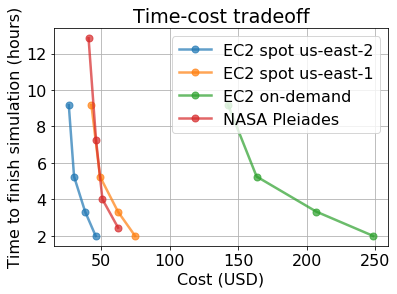

In [7]:
plt.rcParams['font.size'] = 16

plot_kwargs = dict(linestyle='-', marker='o', linewidth=2.5, markersize=7.0, alpha=0.7)
plt.plot(cost_impi_2, t_impi, **plot_kwargs, label='EC2 spot us-east-2')
plt.plot(cost_impi_1, t_impi, **plot_kwargs, label='EC2 spot us-east-1')
plt.plot(cost_impi_od, t_impi, **plot_kwargs, label='EC2 on-demand')
plt.plot(cost_nas, t_nas, **plot_kwargs, label='NASA Pleiades')
plt.legend()

plt.grid()
plt.xlabel('Cost (USD)')
plt.ylabel('Time to finish simulation (hours)')

plt.title('Time-cost tradeoff')
plt.savefig('cost-time.png', dpi=300, bbox_inches='tight')

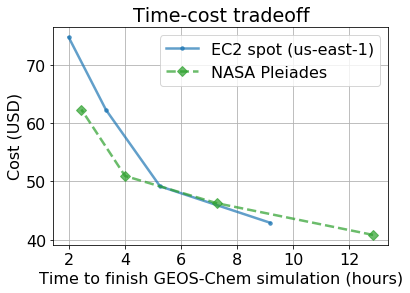

In [8]:
plt.rcParams['font.size'] = 16

plot_kwargs = dict(linestyle='-', marker='o', linewidth=2.5, markersize=7.0, alpha=0.7)
plt.plot(t_impi, cost_impi_1, **plot_kwargs, label='EC2 spot (us-east-1)')
plt.plot(t_nas, cost_nas, **plot_kwargs, label='NASA Pleiades', color='C2')

marker_list = ['.', 'D']
linestyle_list = ['-', '--']
for i, line in enumerate(plt.gca().get_lines()):
    line.set_marker(marker_list[i])
    line.set_linestyle(linestyle_list[i])

plt.legend()

plt.grid()
plt.ylabel('Cost (USD)')
plt.xlabel('Time to finish GEOS-Chem simulation (hours)')

plt.title('Time-cost tradeoff')
plt.savefig('time-cost.png', dpi=300, bbox_inches='tight')